In [1]:
!pip install tensorflow keras opencv-python

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from IPython.display import display, Image
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping


In [3]:
# Define the path to the dataset folders
happy_folder = "D:/Data Sets for Resume/Image Classification(1)/happy"
sad_folder = "D:/Data Sets for Resume/Image Classification(1)/Sad"
angry_folder = "D:/Data Sets for Resume/Image Classification(1)/Angry"



In [4]:
type(happy_folder)

str

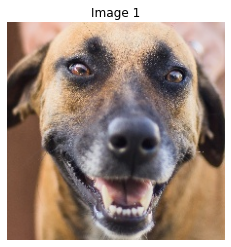

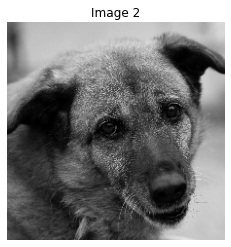

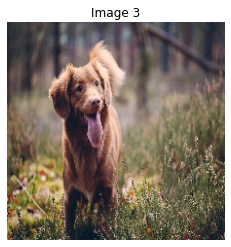

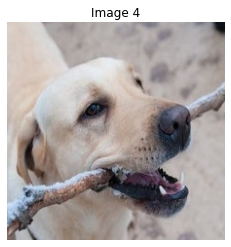

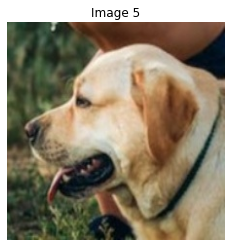

In [5]:
import matplotlib.pyplot as plt
import os
from matplotlib.image import imread

# Path to the directory containing your images
image_dir = happy_folder

# List all image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

# Display the first 5 images
for i in range(5):
    image_file = image_files[i]
    image_path = os.path.join(image_dir, image_file)
    image = imread(image_path)

    if image is not None:
        plt.imshow(image)
        plt.title(f'Image {i + 1}')
        plt.axis('off')  # Turn off axis numbers and ticks
        plt.show()
    else:
        print(f"Error loading image: {image_path}")


In [6]:
!pip install opencv-python
!pip install matplotlib

## Data Loading and Preprocessing

In [7]:

# Function to load and preprocess images
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (48, 48))  # Resize to a fixed size for the model
            images.append(img)
    return images

# Load images and labels for each emotion
happy_images = load_images_from_folder(happy_folder)
sad_images = load_images_from_folder(sad_folder)
angry_images = load_images_from_folder(angry_folder)


# Create labels for each emotion category
happy_labels = [0] * len(happy_images)
sad_labels = [1] * len(sad_images)
angry_labels = [2] * len(angry_images)


# Concatenate images and labels
X = np.array(happy_images + sad_images + angry_images)
y = np.array(happy_labels + sad_labels + angry_labels)

# Normalize pixel values to range [0, 1]
X = X.astype('float32') / 255.0

# One-hot encode the labels
y = np_utils.to_categorical(y, 3)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
happy_images[0]

array([[ 69,  72, 105, ..., 183, 193, 203],
       [ 69,  72,  96, ..., 190, 192, 195],
       [ 69,  72,  93, ..., 201, 194, 184],
       ...,
       [ 97,  97,  94, ..., 143, 138, 144],
       [ 96,  95,  92, ..., 152, 146, 143],
       [ 97,  96,  95, ..., 152, 153, 150]], dtype=uint8)

## Training and Evaluation

In [9]:
# Build the CNN model
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

print(model.summary())
# Compile the model with class weights
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       7

## Testing the model on Pet's images

In [10]:
# Calculate class weights
total_samples = len(y_train)
class_weights = {0: total_samples / np.sum(y_train[:, 0]), 
                 1: total_samples / np.sum(y_train[:, 1]), 
                 2: total_samples / np.sum(y_train[:, 2])}
# Train the model with class weights
history = model.fit(X_train.reshape(-1, 48, 48, 1), y_train, batch_size=32, epochs=100, validation_split=0.1, class_weight=class_weights,verbose=0)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test.reshape(-1, 48, 48, 1), y_test)
losstr, accuracytr = model.evaluate(X_train.reshape(-1, 48, 48, 1), y_train)


# Save the trained model
model.save("facial_expression_model.h5")

19/19 [==============================] - 2s 103ms/step - loss: 0.3738 - accuracy: 0.9400


1/1 [==============================] - 0s 223ms/step
Predicted Emotion: happy
Confidence [happy, sad, angry]: [9.9999940e-01 9.9951665e-09 5.4888062e-07]


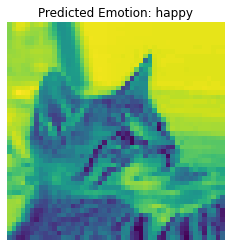

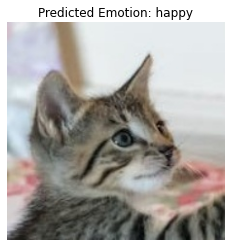

1/1 [==============================] - 0s 53ms/step
Predicted Emotion: sad
Confidence [happy, sad, angry]: [7.7435573e-07 9.9999928e-01 2.3206281e-08]


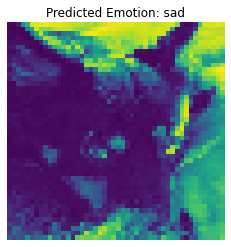

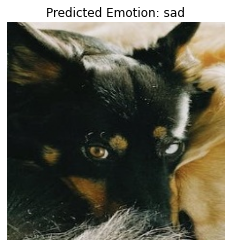

1/1 [==============================] - 0s 52ms/step
Predicted Emotion: angry
Confidence [happy, sad, angry]: [2.4567412e-06 6.4366066e-07 9.9999690e-01]


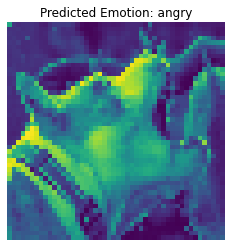

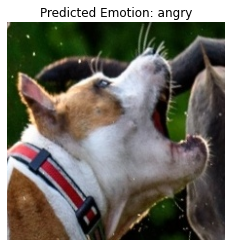

In [19]:
from keras.models import load_model
# Load the saved model
loaded_model = load_model("facial_expression_model.h5")




# Function to load and preprocess images
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (48, 48))  # Resize to a fixed size for the model
            images.append(img)
    return images


# Load a custom test image
custom_test_image_path1 = "D:/Data Sets for Resume/Image Classification(1)/happy/012.jpg"
custom_test_image_path2 = "D:/Data Sets for Resume/Image Classification(1)/Sad/008.jpg"
custom_test_image_path3 = "D:/Data Sets for Resume/Image Classification(1)/Angry/aug-32-45.jpg"
image=[custom_test_image_path1,custom_test_image_path2,custom_test_image_path3]

for i in image:
    custom_test_image = cv2.imread(i)
    custom_test_image = cv2.cvtColor(custom_test_image, cv2.COLOR_BGR2GRAY)
    custom_test_image = cv2.resize(custom_test_image, (48, 48))
    custom_test_image = custom_test_image.astype('float32') / 255.0
    
    # Reshape the image to match the model input shape
    custom_test_image = np.expand_dims(custom_test_image, axis=0)
    custom_test_image = np.expand_dims(custom_test_image, axis=-1)

    # Make predictions on the custom test image
    prediction = loaded_model.predict(custom_test_image)
    prediction_prob = prediction[0]

    emotion_label = np.argmax(prediction[0])

    # Map the predicted label to emotion class
    emotion_classes = {0: 'happy', 1: 'sad', 2: 'angry'}
    predicted_emotion = emotion_classes[emotion_label]

    # Print the custom test image and its predicted label
    print(f"Predicted Emotion: {predicted_emotion}")
    print(f"Confidence [happy, sad, angry]: {prediction_prob}")

    import matplotlib.pyplot as plt

    #Display the custom test image using matplotlib
    plt.imshow(custom_test_image[0, :, :, 0])
    plt.title(f"Predicted Emotion: {predicted_emotion}")
    plt.axis('off')  # Hide axes
    plt.show()

    from PIL import Image
    # Display the original custom test image using PIL

    img_pil = Image.open(i)
    plt.imshow(np.array(img_pil))
    plt.title(f"Predicted Emotion: {predicted_emotion}")
    plt.axis('off')  # Hide axes
    plt.show()